## Создание искусственных нейронных сетей

### Импорт собранных и обработанных данных

In [8]:
import pandas as pd

# Для mac
df_nlp = pd.read_csv(r'/Users/user/Documents/ML.csv')

# Для win
#df_nlp = pd.read_csv(r'C:\Users\User\Downloads\ML.csv'), если в начале лишних столбец с индексами

df_ml = df_nlp.drop(df_nlp.columns[[0,4,5,6,7,8,9]], axis = 1)

categories = {}
for key, value in enumerate(df_ml["rubric"].unique()):
    categories[value] = key + 1
df_ml['category_code'] = df_ml['rubric'].map(categories)

df_ml

,rubric,title,text,text_lemm,title_lemm,category_code
0,Политика,Песков: для начала переговоров с Украиной нужн...,"Для того, чтобы начался дальнейший переговорны...",начинаться дальнейший переговорный процесс рос...,песков начало переговоры украина нужный полити...,1
1,Политика,Песков: Москва ожидает готовность Киева обсужд...,Официальный представитель Кремля Дмитрий Песко...,официальный представитель кремль дмитрий песо...,песок москва ожидать готовность киев обсуждат...,1
2,Политика,"В Кремле объяснили, почему продолжается спецоп...",Представитель Кремля Дмитрий Песков сообщил об...,представитель кремль дмитрий песок сообщать о...,кремль объяснять почему продолжаться спецопер...,1
3,Политика,Кремль: для начала переговоров с Украиной нужн...,"Представитель Кремля заявил, что, помимо преод...",представитель кремль заявлять помимо преодоле...,кремль начало переговоры украина нужный полит...,1
4,Политика,Песков: для начала переговоров России и Украин...,Официальный представитель Кремля Дмитрий Песко...,официальный представитель кремль дмитрий песо...,песок начинать переговоры россия украина нужн...,1
...,...,...,...,...,...,...
256325,Наука,Американский посадочный модуль InSight на Марс...,Стационарный посадочный модуль InSight был дос...,стационарный посадочный модуль insight достав...,американский посадочный модуль insight марс п...,9
256326,Наука,Устройство для развития растений в космосе без...,"Устройство, позволяющее выращивать растения в ...",устройство позволять выращивать растение косм...,устройство развитие растение космос участие ч...,9
256327,Наука,Первый запуск новой японской ракеты-носителя H...,Новую японскую ракету-носитель тяжелого класса...,новый японский ракета носитель тяжелый класс ...,первый запуск новый японский ракета носитель ...,9
256328,Наука,Первый запуск новой японской ракеты H3 может с...,"Первый запуск новой ракеты-носителя H3, котора...",первый запуск новый ракета носитель h который...,первый запуск новый японский ракета h состоят...,9


### Импорт необходимых библиотек

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.preprocessing import OneHotEncoder

### TensorFlow

In [10]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm, trange

# from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score

# from gensim.models import Word2Vec

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten, Input, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras import backend as K
# from keras.engine.topology import Layer

Максимальное количество слов в самом длинном описании заявки: 1118 слов
65398
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2560256   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 2,562,569
Trainable params: 2,562,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1262/1262 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.8119
Epoch 1: val_accuracy improved from -inf to 0.84045, saving model to model.h5
1262/1262 [==============================] - 30s 23ms/s

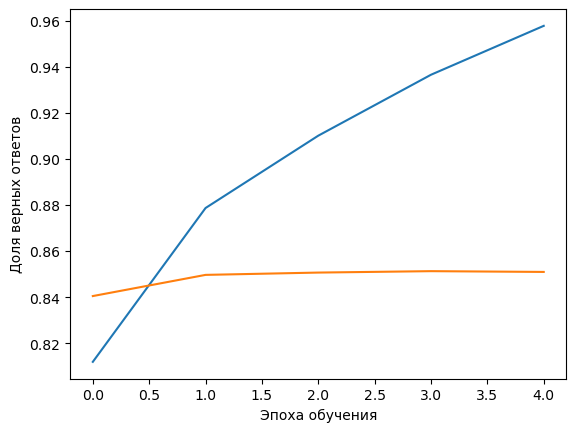

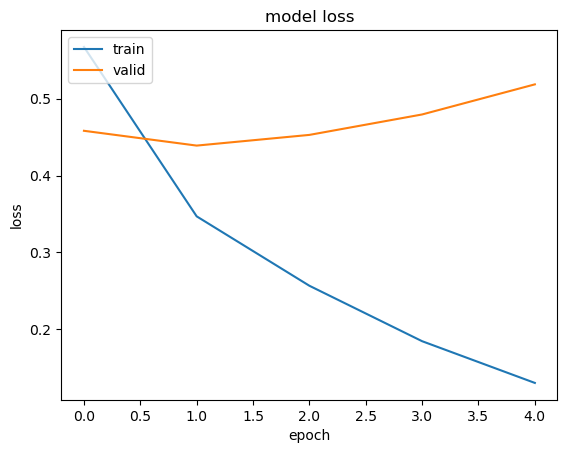

2404/2404 [==============================] - 7s 3ms/step
Оценка теста: 0.4974449574947357
Оценка точности модели: 0.8584116697311401
              precision    recall  f1-score   support

    Политика       0.89      0.89      0.89     19364
    Общество       0.81      0.75      0.78     14627
   Экономика       0.92      0.93      0.92     12924
      В мире       0.64      0.54      0.58      4572
       Спорт       0.85      0.87      0.86      7098
Происшествия       0.97      0.96      0.96      9432
    Культура       0.80      0.76      0.78      2351
  Технологии       0.90      0.87      0.89      4418
       Наука       0.86      0.84      0.85      2113

   micro avg       0.87      0.85      0.86     76899
   macro avg       0.85      0.82      0.84     76899
weighted avg       0.87      0.85      0.86     76899
 samples avg       0.85      0.85      0.85     76899

[[17674   614   123   692   193    33    11    16     8]
 [ 1365 10965   618   390   681    87   172   227  

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
X = df_ml.loc[:, ['text_lemm']]
y = df_ml.loc[:, ['rubric','category_code']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df = df_ml

# Избавляемся от пустых строк
df = df[df['text_lemm'].notna()]
X_train = X_train[X_train.notna()]
X_test = X_test[X_test.notna()]
y_train = y_train[y_train.notna()]
y_test = y_test[y_test.notna()]

max_words = 0
for text in X_train['text_lemm']:
    words = len(text.split())
    if words > max_words:
        max_words = words
print('Максимальное количество слов в самом длинном описании заявки: {} слов'.format(max_words))

# Максимальное количество слов
num_words = 10000 #Можно менять

# Количество классов (тем)
rubrics = ['Политика', 'Общество', 'Экономика',
           'В мире', 'Спорт', 'Происшествия',
           'Культура', 'Технологии', 'Наука']
my_tags = rubrics

nb_classes = len(rubrics)
posts_train = X_train['text_lemm']
posts_test = X_test['text_lemm']

# Максимально количество слов в тексте
max_post_len = 35 #Можно менять

# Преобразуем классы в векторный вид
y_train = to_categorical(y_train['category_code'] - 1, nb_classes)
y_test = to_categorical(y_test['category_code'] - 1, nb_classes)

# Производим токенизацию текста
tokenizer = Tokenizer(num_words=num_words)  # 10000 самых встречаемых слов
#tokenizer = Tokenizer()

tokenizer.fit_on_texts(df_ml['text_lemm'].tolist())
print(len(tokenizer.index_word))
#num_words = len(tokenizer.index_word) - 1

# Слова в виде чисел
sequences_train = tokenizer.texts_to_sequences(posts_train.to_list())
sequences_test = tokenizer.texts_to_sequences(posts_test.to_list())

# Преобразуем векторы к одной длине путем добавления нулей
x_train = pad_sequences(sequences_train, maxlen=max_post_len)
x_test = pad_sequences(sequences_test, maxlen=max_post_len)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)


model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(10000,))) #Можно менять dense 256
model.add(Dropout(0.2)) #Можно менять Dropout
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(207, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))
model.summary()


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.load_weights('model1.h5')
model_save_path = 'model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

history = model.fit(x_train,
                    y_train,
                    epochs=5, #Можно менять
                    batch_size=128, #Можно менять
                    validation_split=0.1, #Можно менять
                    callbacks=[checkpoint_callback])

score = model.evaluate(x_test, y_test, batch_size=512, verbose=1)

print()
print("Оценка теста: {}".format(score[0]))
print("Оценка точности модели: {}".format(score[1]))


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
#plt.legend()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

y_pred=model.predict(x_test)
y_pred=(y_pred>=0.5).astype("int")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Оценка теста: {}".format(score[0]))
print("Оценка точности модели: {}".format(score[1]))
print(classification_report(y_test, y_pred, target_names=my_tags))
print(confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)))